In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.metrics import accuracy_score
import numpy as np 

### **Import dataset**

In [ ]:
import pandas as pd
# Đặt tên cột data
columns = ['wkc','wkr','wrc','wrr','bkc','bkr','moves']
data = pd.read_csv('/content/krkopt.data', names=columns,header=None)

In [ ]:
#Số cột, số dòng
data.shape

(28056, 7)

In [ ]:
data.head()

,wkc,wkr,wrc,wrr,bkc,bkr,moves
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


### **Xử lý dữ liệu**

In [ ]:
#Chuẩn hóa dữ liệu về số
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

columns = list(data.select_dtypes('object').columns)
for col in columns:
    data[col] = encoder.fit_transform(data[col])
data.head()

,wkc,wkr,wrc,wrr,bkc,bkr,moves
0,0,1,1,3,2,2,0
1,0,1,2,1,2,2,0
2,0,1,2,1,3,1,0
3,0,1,2,1,3,2,0
4,0,1,2,2,2,1,0


In [ ]:
# In kiểm tra
X = data.values[:, :-1]
print(X)
Y = data.values[:, -1]
print(Y)

[[0 1 1 3 2 2]
 [0 1 2 1 2 2]
 [0 1 2 1 3 1]
 ...
 [1 1 6 7 4 7]
 [1 1 6 7 5 5]
 [1 1 6 7 6 5]]
[ 0  0  0 ... 11 11 11]


In [ ]:
#Đếm số trường hợp
from collections import Counter
counter = Counter()
counter.update(Y)
print(counter)

Counter({6: 4553, 13: 4194, 15: 3597, 2: 2854, 0: 2796, 3: 2166, 12: 1985, 7: 1712, 1: 1433, 9: 683, 10: 592, 4: 471, 11: 390, 16: 246, 5: 198, 14: 81, 8: 78, 17: 27})


In [ ]:
X = np.asarray(X.astype(np.float32))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
print('Train:')
print(X_train.shape)
print(Y_train.shape)

print('Test:')
print(X_test.shape)
print(Y_test.shape)

Train:
(19639, 6)
(19639,)
Test:
(8417, 6)
(8417,)


### **Tạo các model FNN**

### **Model 1**

In [ ]:
#Chuẩn hóa bằng Categorical
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)

In [ ]:
#Tạo Neural Networks cho Classification
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='tanh'))
model1.add(layers.Dense(32, activation='tanh'))
model1.add(layers.Dense(18,activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model1.fit(X_train,Y_train,epochs=100, batch_size=10)

Epoch 1/100
1964/1964 [==============================] - 4s 2ms/step - loss: 2.0763 - accuracy: 0.2586
Epoch 2/100
1964/1964 [==============================] - 3s 2ms/step - loss: 1.7168 - accuracy: 0.3704
Epoch 3/100
1964/1964 [==============================] - 3s 2ms/step - loss: 1.5788 - accuracy: 0.4089
Epoch 4/100
1964/1964 [==============================] - 3s 2ms/step - loss: 1.5099 - accuracy: 0.4297
Epoch 5/100
1964/1964 [==============================] - 3s 2ms/step - loss: 1.4682 - accuracy: 0.4430
Epoch 6/100
1964/1964 [==============================] - 3s 2ms/step - loss: 1.4362 - accuracy: 0.4516
Epoch 7/100
1964/1964 [==============================] - 3s 2ms/step - loss: 1.4121 - accuracy: 0.4585
Epoch 8/100
1964/1964 [==============================] - 3s 2ms/step - loss: 1.3913 - accuracy: 0.4643
Epoch 9/100
1964/1964 [==============================] - 3s 2ms/step - loss: 1.3741 - accuracy: 0.4698
Epoch 10/100
1964/1964 [==============================] - 3s 2ms/step - l

In [ ]:
y_pred = model1.predict(X_test)
y_pred = y_pred.argmax(axis=1)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))
M1 = accuracy_score(Y_test,y_pred)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       845
           1       0.53      0.57      0.55       419
           2       0.50      0.47      0.49       867
           3       0.68      0.57      0.62       662
           4       0.66      0.56      0.61       142
           5       0.76      0.35      0.48        71
           6       0.63      0.74      0.68      1346
           7       0.52      0.56      0.54       533
           8       0.91      0.38      0.54        26
           9       0.51      0.27      0.36       186
          10       0.58      0.58      0.58       163
          11       0.60      0.49      0.54       114
          12       0.45      0.50      0.47       616
          13       0.57      0.56      0.56      1219
          14       0.56      0.39      0.46        23
          15       0.54      0.51      0.53      1088
          16       0.76      0.77      0.76        92
          17       0.71    

### **Model 2**

In [ ]:
# Thêm tầng
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='tanh'))
model2.add(layers.Dense(32, activation='tanh'))
model2.add(layers.Dense(32, activation='tanh'))
model2.add(layers.Dense(32, activation='tanh'))
model2.add(layers.Dense(18,activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.fit(X_train,Y_train,epochs=100, batch_size=10)

Epoch 1/100
1964/1964 [==============================] - 4s 2ms/step - loss: 1.9374 - accuracy: 0.2883
Epoch 2/100
1964/1964 [==============================] - 4s 2ms/step - loss: 1.6138 - accuracy: 0.3959
Epoch 3/100
1964/1964 [==============================] - 4s 2ms/step - loss: 1.5043 - accuracy: 0.4227
Epoch 4/100
1964/1964 [==============================] - 4s 2ms/step - loss: 1.4355 - accuracy: 0.4436
Epoch 5/100
1964/1964 [==============================] - 4s 2ms/step - loss: 1.3942 - accuracy: 0.4544
Epoch 6/100
1964/1964 [==============================] - 4s 2ms/step - loss: 1.3548 - accuracy: 0.4706
Epoch 7/100
1964/1964 [==============================] - 4s 2ms/step - loss: 1.3222 - accuracy: 0.4846
Epoch 8/100
1964/1964 [==============================] - 4s 2ms/step - loss: 1.2899 - accuracy: 0.4910
Epoch 9/100
1964/1964 [==============================] - 4s 2ms/step - loss: 1.2522 - accuracy: 0.5059
Epoch 10/100
1964/1964 [==============================] - 4s 2ms/step - l

In [ ]:
y_pred = model2.predict(X_test)
y_pred = y_pred.argmax(axis=1)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))
M2 = accuracy_score(Y_test,y_pred)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       845
           1       0.67      0.75      0.71       419
           2       0.59      0.72      0.65       867
           3       0.72      0.73      0.72       662
           4       0.60      0.61      0.61       142
           5       0.58      0.72      0.64        71
           6       0.76      0.75      0.75      1346
           7       0.64      0.63      0.64       533
           8       0.53      0.62      0.57        26
           9       0.62      0.54      0.57       186
          10       0.62      0.64      0.63       163
          11       0.57      0.70      0.63       114
          12       0.65      0.51      0.57       616
          13       0.71      0.64      0.67      1219
          14       0.48      0.48      0.48        23
          15       0.68      0.66      0.67      1088
          16       0.89      0.82      0.85        92
          17       0.38    

### **Model 3**

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(18,activation='softmax'))
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
#epochs chạy 100 lần
model3.fit(X_train,Y_train,epochs=100, batch_size=10)

Epoch 1/100
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.2874
Epoch 2/100
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0395 - accuracy: 0.4027
Epoch 3/100
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0374 - accuracy: 0.4378
Epoch 4/100
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0363 - accuracy: 0.4596
Epoch 5/100
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0353 - accuracy: 0.4781
Epoch 6/100
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0346 - accuracy: 0.4904
Epoch 7/100
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0339 - accuracy: 0.5099
Epoch 8/100
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0335 - accuracy: 0.5165
Epoch 9/100
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0330 - accuracy: 0.5274
Epoch 10/100
1964/1964 [==============================] - 4s 2ms/step - l

In [ ]:
y_pred = model3.predict(X_test)
y_pred = y_pred.argmax(axis=1)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))
M3 = accuracy_score(Y_test,y_pred)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       845
           1       0.79      0.58      0.66       419
           2       0.59      0.66      0.62       867
           3       0.83      0.66      0.73       662
           4       0.69      0.64      0.66       142
           5       0.80      0.55      0.65        71
           6       0.72      0.77      0.75      1346
           7       0.62      0.69      0.65       533
           8       0.52      0.62      0.56        26
           9       0.47      0.46      0.47       186
          10       0.57      0.66      0.62       163
          11       0.78      0.69      0.73       114
          12       0.61      0.50      0.55       616
          13       0.63      0.71      0.66      1219
          14       0.44      0.30      0.36        23
          15       0.65      0.59      0.62      1088
          16       0.62      0.86      0.72        92
          17       0.18    

### **Model 4**

In [ ]:
#Thêm tầng
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(18,activation='softmax'))
model4.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
model4.fit(X_train,Y_train, epochs=200, batch_size=10)

Epoch 1/200
1964/1964 [==============================] - 5s 2ms/step - loss: 0.0445 - accuracy: 0.2918
Epoch 2/200
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.3959
Epoch 3/200
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0381 - accuracy: 0.4241
Epoch 4/200
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0372 - accuracy: 0.4434
Epoch 5/200
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0367 - accuracy: 0.4561
Epoch 6/200
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0358 - accuracy: 0.4726
Epoch 7/200
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.4783
Epoch 8/200
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.4857
Epoch 9/200
1964/1964 [==============================] - 4s 2ms/step - loss: 0.0344 - accuracy: 0.4972
Epoch 10/200
1964/1964 [==============================] - 4s 2ms/step - l

In [ ]:
y_pred = model4.predict(X_test)
y_pred = y_pred.argmax(axis=1)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))
M4 = accuracy_score(Y_test,y_pred)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       845
           1       0.60      0.46      0.52       419
           2       0.60      0.67      0.63       867
           3       0.77      0.67      0.72       662
           4       0.72      0.58      0.64       142
           5       0.73      0.54      0.62        71
           6       0.70      0.80      0.75      1346
           7       0.57      0.63      0.60       533
           8       0.85      0.42      0.56        26
           9       0.56      0.58      0.57       186
          10       0.65      0.55      0.60       163
          11       0.67      0.67      0.67       114
          12       0.55      0.55      0.55       616
          13       0.70      0.66      0.68      1219
          14       0.42      0.43      0.43        23
          15       0.66      0.63      0.65      1088
          16       0.91      0.66      0.77        92
          17       0.43    

### **So sánh Accuracy của 4 Model**



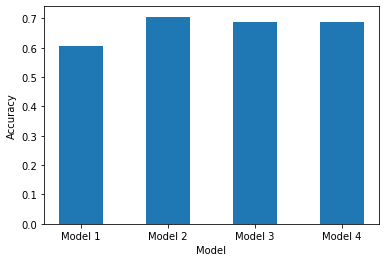

In [ ]:
import matplotlib.pyplot as plt
Acc = [M1,M2,M3,M4]
All_Model = ['Model 1','Model 2','Model 3','Model 4']
x_pos = [i for i, _ in enumerate(All_Model)]
plt.xticks(x_pos, All_Model)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.bar(x_pos,Acc,width = 0.5)
plt.show()